# News EDA

In [3]:
pip install koreanize_matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')  
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/mac/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
import koreanize_matplotlib

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)

In [5]:
news_df=pd.read_csv('./Data/news.csv')
news_df.head()

,news_id,category,subcategory,title,abstract,url,title_entities,abstract_entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, and Prince Philip Swear By","Shop the notebooks, jackets, and more that the royals can't live without.",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"", ""Type"": ""P"", ""WikidataId"": ""Q80976"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [48], ""SurfaceForms"": [""Prince Philip""]}, {""Label"": ""Charles, Prince of Wales"", ""Type"": ""P"", ""WikidataId"": ""Q43274"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [28], ""SurfaceForms"": [""Prince Charles""]}, {""Label"": ""Elizabeth II"", ""Type"": ""P"", ""WikidataId"": ""Q9682"", ""Confidence"": 0.97, ""OccurrenceOffsets"": [11], ""SurfaceForms"": [""Queen Elizabeth""]}]",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding you back and keeping you from shedding that unwanted belly fat for good.,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""WikidataId"": ""Q193583"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [20], ""SurfaceForms"": [""Belly Fat""]}]","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""WikidataId"": ""Q193583"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [97], ""SurfaceForms"": [""belly fat""]}]"
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches of Ukraine's War,"Lt. Ivan Molchanets peeked over a parapet of sand bags at the front line of the war in Ukraine. Next to him was an empty helmet propped up to trick snipers, already perforated with multiple holes.",https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId"": ""Q212"", ""Confidence"": 0.946, ""OccurrenceOffsets"": [87], ""SurfaceForms"": [""Ukraine""]}]"
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My Mental Health.,"I felt like I was a fraud, and being an NBA wife didn't help that. In fact, it nearly destroyed me.",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ""Type"": ""O"", ""WikidataId"": ""Q155223"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [40], ""SurfaceForms"": [""NBA""]}]"
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a Dermatologist","They seem harmless, but there's a very good reason you shouldn't ignore them. The post How to Get Rid of Skin Tags, According to a Dermatologist appeared first on Reader's Digest.",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataId"": ""Q3179593"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [18], ""SurfaceForms"": [""Skin Tags""]}]","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataId"": ""Q3179593"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [105], ""SurfaceForms"": [""Skin Tags""]}, {""Label"": ""Dermatology"", ""Type"": ""C"", ""WikidataId"": ""Q171171"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [131], ""SurfaceForms"": [""Dermatologist""]}, {""Label"": ""Reader's Digest"", ""Type"": ""M"", ""WikidataId"": ""Q371820"", ""Confidence"": 0.999, ""OccurrenceOffsets"": [163], ""SurfaceForms"": [""Reader's Digest""]}]"


In [6]:
news_df.drop('url',axis=1,inplace=True)

In [7]:
news_df.shape

(51282, 7)

In [8]:
news_df.isna().sum()

news_id                 0
category                0
subcategory             0
title                   0
abstract             2666
title_entities          3
abstract_entities       4
dtype: int64

In [9]:
news_df.dropna(axis=0 ,inplace=True)

In [11]:
news_df['news_id'].nunique()


48612

### 데이터 정제

In [12]:
import re

# 영어, 소문자로 통일, 불용어 제거, 숫자 제거(x), 특수문자 제거, 마지막에 내용이 줄임표시 되어있는 것들이 있음(...)
stop_words=set(stopwords.words('english'))  


def clean_text(text):
    text=text.lower()
    #text=re.sub(r'\d+','',text)
    text=re.sub(r'[^\w\s]','',text) # 특수문자 제거
    text=re.sub(r'\s+',' ',text) # 연속된 공백 하나의 공백으로
    tokens=word_tokenize(text)
    for token in tokens:
        if token in stop_words:
            tokens.remove(token)    
    text=' '.join(tokens)   
    
    return text
    

In [13]:
news_df['title']=news_df['title'].apply(lambda x: clean_text(x))  
news_df['abstract']=news_df['abstract'].apply(lambda x: clean_text(x))

## 카테고리 및 서브카테고리별 뉴스 수

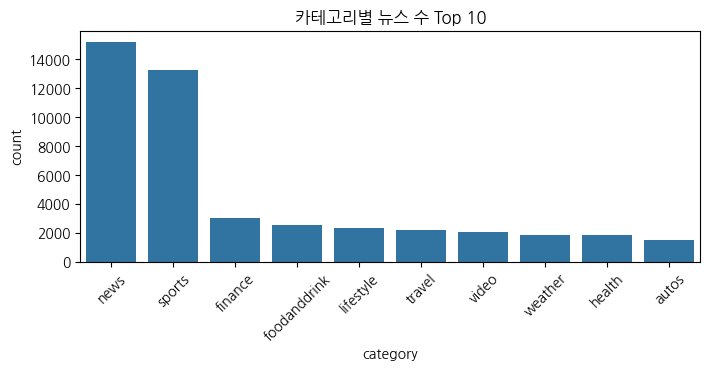

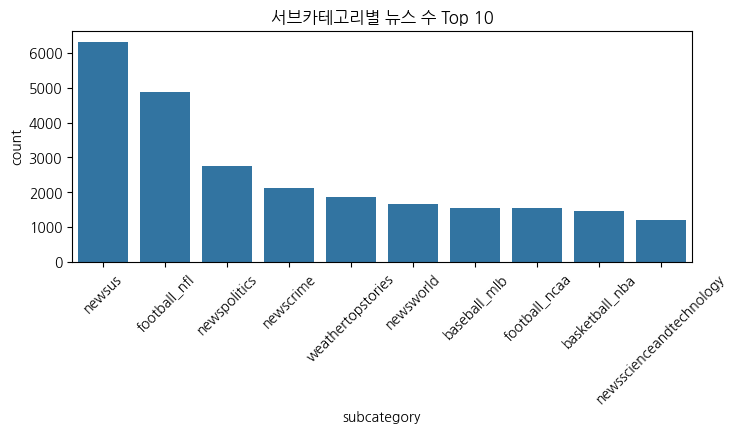

In [14]:
# 카테고리, 서브 카테고리 상위 10개씩 확인

plt.figure(figsize=(8, 3))
sns.countplot(x='category', data=news_df, order=news_df['category'].value_counts().index[:10])
plt.title('카테고리별 뉴스 수 Top 10')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 3))
sns.countplot(
    x='subcategory',
    data=news_df,
    order=news_df['subcategory'].value_counts().index[:10] 
)
plt.xticks(rotation=45)
plt.title('서브카테고리별 뉴스 수 Top 10')
plt.show()

In [15]:
news_df['category'].value_counts()[:10]

category
news            15203
sports          13230
finance          3047
foodanddrink     2513
lifestyle        2318
travel           2223
video            2064
weather          1879
health           1834
autos            1502
Name: count, dtype: int64

In [16]:
news_df['subcategory'].value_counts()[:10]

subcategory
newsus                      6309
football_nfl                4881
newspolitics                2760
newscrime                   2120
weathertopstories           1878
newsworld                   1666
baseball_mlb                1550
football_ncaa               1547
basketball_nba              1464
newsscienceandtechnology    1201
Name: count, dtype: int64

## 뉴스 title 및 abstract 길이 분포(공백 포함 yes )

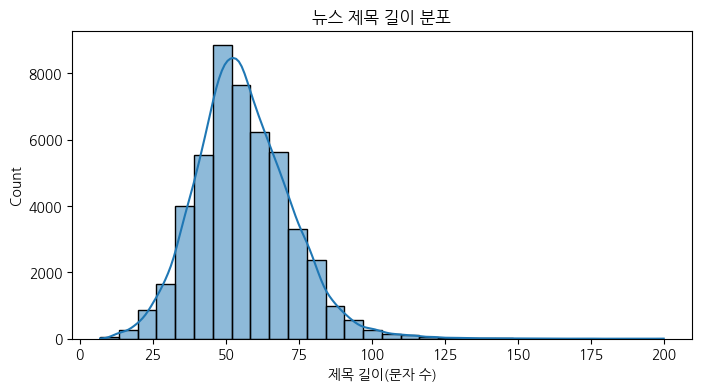

In [17]:
news_df['title_length'] = news_df['title'].apply(len)

plt.figure(figsize=(8, 4))
sns.histplot(news_df['title_length'], bins=30, kde=True)
plt.title('뉴스 제목 길이 분포')
plt.xlabel('제목 길이(문자 수)')
plt.show()


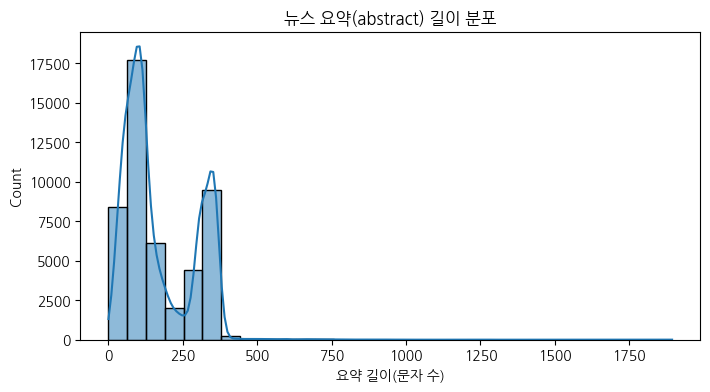

In [18]:
news_df['abstract_length'] = news_df['abstract'].fillna('').apply(len)

plt.figure(figsize=(8, 4))
sns.histplot(news_df['abstract_length'], bins=30, kde=True)
plt.title('뉴스 요약(abstract) 길이 분포')
plt.xlabel('요약 길이(문자 수)')
plt.show()


In [19]:
news_df[['title_length','abstract_length']].describe()

,title_length,abstract_length
count,48612.000000,48612.000000
mean,56.105817,169.802374
std,16.398551,120.808073
min,7.000000,0.000000
25%,45.000000,78.000000
50%,55.000000,119.000000
75%,66.000000,301.000000
max,200.000000,1894.000000


## 뉴스 title 및 abstract 토큰 길이 분포(공백 포함 no )

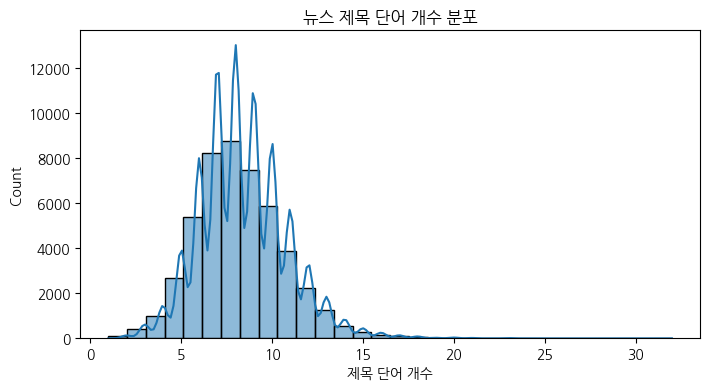

In [20]:
import re
news_df['title_word_count'] = news_df['title'].apply(lambda x: len(x.split()))
news_df['abstract_word_count'] = news_df['abstract'].apply(lambda x: len(x.split()))

# 시각화
plt.figure(figsize=(8, 4))
sns.histplot(news_df['title_word_count'], bins=30, kde=True)
plt.title('뉴스 제목 단어 개수 분포')
plt.xlabel('제목 단어 개수')
plt.show()


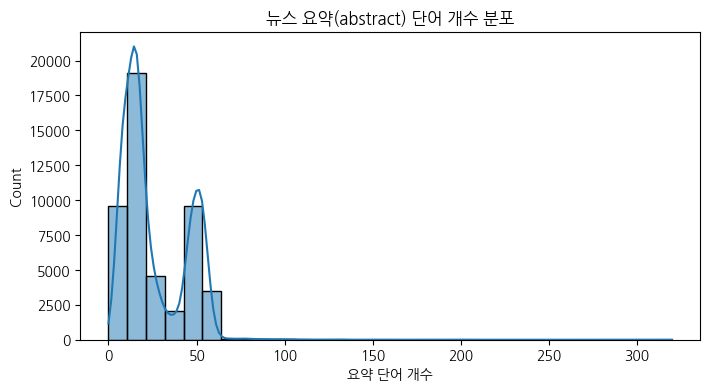

In [21]:
plt.figure(figsize=(8, 4))
sns.histplot(news_df['abstract_word_count'], bins=30, kde=True) 
plt.title('뉴스 요약(abstract) 단어 개수 분포')
plt.xlabel('요약 단어 개수')
plt.show()

In [22]:
news_df[['title_word_count','abstract_word_count']].describe()

,title_word_count,abstract_word_count
count,48612.000000,48612.000000
mean,8.453859,25.659981
std,2.412994,18.284916
min,1.000000,0.000000
25%,7.000000,12.000000
50%,8.000000,18.000000
75%,10.000000,45.000000
max,32.000000,320.000000


In [23]:
news_df.head(2)

,news_id,category,subcategory,title,abstract,title_entities,abstract_entities,title_length,abstract_length,title_word_count,abstract_word_count
0,N55528,lifestyle,lifestyleroyals,brands queen elizabeth prince charles prince philip swear,shop notebooks jackets more the royals cant live without,"[{""Label"": ""Prince Philip, Duke of Edinburgh"", ""Type"": ""P"", ""WikidataId"": ""Q80976"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [48], ""SurfaceForms"": [""Prince Philip""]}, {""Label"": ""Charles, Prince of Wales"", ""Type"": ""P"", ""WikidataId"": ""Q43274"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [28], ""SurfaceForms"": [""Prince Charles""]}, {""Label"": ""Elizabeth II"", ""Type"": ""P"", ""WikidataId"": ""Q9682"", ""Confidence"": 0.97, ""OccurrenceOffsets"": [11], ""SurfaceForms"": [""Queen Elizabeth""]}]",[],57,56,8,9
1,N19639,health,weightloss,50 worst habits belly fat,seemingly harmless habits holding back keeping from shedding unwanted belly fat good,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""WikidataId"": ""Q193583"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [20], ""SurfaceForms"": [""Belly Fat""]}]","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""WikidataId"": ""Q193583"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [97], ""SurfaceForms"": [""belly fat""]}]",25,84,5,12


## title_entities, abstract_entities entity 빈도 확인

### 개체명(Label) 추출 함수

In [24]:
# Entity 빈도 
import json
from collections import Counter

# title_entities와 abstract_entities에서 개체명(Label) 추출 함수
def extract_entities(entity_column):
    entities = []
    for entity_list in entity_column.dropna():  # 결측값 제외
        try:
            parsed_entities = json.loads(entity_list)  # JSON 파싱
            entities.extend([ent["Label"] for ent in parsed_entities])
        except json.JSONDecodeError:
            continue  # JSON 파싱 오류 발생 시 무시
    return entities


In [25]:
title_entities_list = extract_entities(news_df['title_entities'])
abstract_entities_list = extract_entities(news_df['abstract_entities'])


#### 타이틀

In [26]:
len(title_entities_list)

56761

In [27]:
Counter(title_entities_list).most_common(10)

[('Donald Trump', 1467),
 ('National Football League', 460),
 ('United States', 393),
 ('New England Patriots', 377),
 ('Houston Astros', 336),
 ('California', 334),
 ('Republican Party (United States)', 284),
 ('Democratic Party (United States)', 268),
 ('Ukraine', 261),
 ('Florida', 260)]

#### 요약

In [28]:
len(abstract_entities_list)

95309

In [29]:
Counter(abstract_entities_list).most_common(10)

[('Donald Trump', 1821),
 ('United States', 1102),
 ('National Football League', 697),
 ('California', 584),
 ('New England Patriots', 547),
 ('Democratic Party (United States)', 449),
 ('Republican Party (United States)', 432),
 ('Houston Astros', 412),
 ('Ukraine', 388),
 ('Florida', 382)]

### 개체 유형(Type) 분석 

- P	Person	인물 
- O	Organization	
- G	Geographical Location	지리적 위치
- C	Concept	개념 
- U	Unknown	알 수 없는 개체
- N	Number	숫자
- F	Facility	시설/건물 
- W	Work of Art	예술 작품 
- S	Software	소프트웨어 
- E	Event	이벤트 
- M	Medical Condition	의학적 상태 
- H	Hotel	호텔 
- B	Biological Entity	생물학적 개체 
- L	Law	법률 
- V	Video Game	비디오 게임 
- J	Journalistic Source	저널리즘 출처 
- K	Park	공원 
- Y	Award	상/수상 
- R	Road	도로
- Q	Currency   화폐 
- I	Instrument	악기 
- A	Aircraft	항공기


In [30]:
def extract_entity_types(entity_column):
    entity_types = []
    for entity_list in entity_column.dropna():
        try:
            parsed_entities = json.loads(entity_list)
            entity_types.extend([ent["Type"] for ent in parsed_entities])
        except json.JSONDecodeError:
            continue
    return entity_types

In [31]:
title_entity_types = extract_entity_types(news_df['title_entities'])
abstract_entity_types = extract_entity_types(news_df['abstract_entities'])

title_entity_types_counts=Counter(title_entity_types)
abstract_entity_types_counts=Counter(abstract_entity_types)

In [32]:
Counter(title_entity_types)

Counter({'O': 14749,
         'P': 14520,
         'G': 11996,
         'U': 3594,
         'C': 3105,
         'N': 1649,
         'F': 1562,
         'W': 898,
         'S': 809,
         'E': 674,
         'M': 594,
         'H': 503,
         'B': 500,
         'L': 474,
         'V': 462,
         'J': 279,
         'K': 155,
         'Y': 110,
         'R': 75,
         'Q': 18,
         'I': 18,
         'A': 17})

In [47]:
Counter(abstract_entity_types)

Counter({'G': 24562,
         'O': 22900,
         'P': 19546,
         'U': 6249,
         'C': 3385,
         'M': 3264,
         'F': 3188,
         'N': 2871,
         'S': 2352,
         'W': 1403,
         'E': 1035,
         'L': 1028,
         'B': 957,
         'H': 626,
         'K': 624,
         'V': 519,
         'J': 369,
         'Y': 219,
         'R': 113,
         'Q': 42,
         'A': 34,
         'I': 23})

In [48]:
entity_type_df = pd.DataFrame({
    "Entity Type": list(title_entity_types_counts.keys()),
    "Count": list(title_entity_types_counts.values())
})
entity_type_df.head(3)

,Entity Type,Count
0,P,14520
1,C,3105
2,O,14749


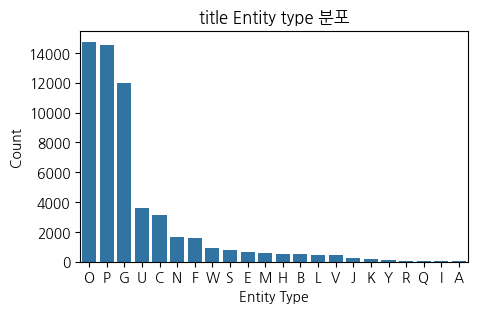

In [49]:
plt.figure(figsize=(5, 3))
sns.barplot(x=sorted(title_entity_types_counts, key=title_entity_types_counts.get, reverse=True), 
            y=sorted(title_entity_types_counts.values(), reverse=True))
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.title("title Entity type 분포")
plt.show()

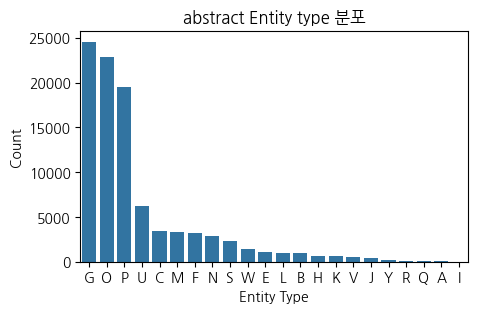

In [50]:
plt.figure(figsize=(5, 3))
sns.barplot(x=sorted(abstract_entity_types_counts, key=abstract_entity_types_counts.get, reverse=True), 
            y=sorted(abstract_entity_types_counts.values(), reverse=True))
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.title("abstract Entity type 분포")
plt.show()

In [51]:
news_df['title_entity_count'] = news_df['title_entities'].apply(lambda x: len(json.loads(x)) if pd.notna(x) else 0)
news_df['abstract_entity_count'] = news_df['abstract_entities'].apply(lambda x: len(json.loads(x)) if pd.notna(x) else 0)


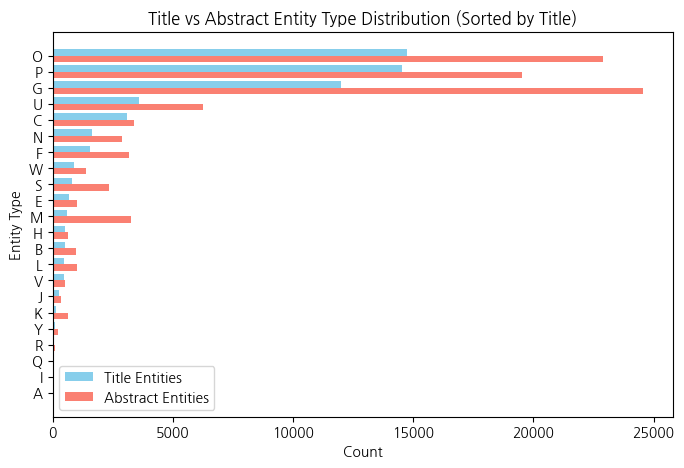

In [57]:
# ppt 용

sorted_labels = sorted(title_entity_types_counts, key=title_entity_types_counts.get, reverse=True)
title_counts = [title_entity_types_counts.get(label, 0) for label in sorted_labels]
abstract_counts = [abstract_entity_types_counts.get(label, 0) for label in sorted_labels]


y = np.arange(len(sorted_labels))
width = 0.4 
plt.figure(figsize=(8, 5))
plt.barh(y - width/2, title_counts, height=width, color="skyblue", label="Title Entities")
plt.barh(y + width/2, abstract_counts, height=width, color="salmon", label="Abstract Entities")
plt.yticks(y, sorted_labels)  
plt.xlabel("Count")
plt.ylabel("Entity Type")
plt.title("Title vs Abstract Entity Type Distribution (Sorted by Title)")
plt.legend()
plt.gca().invert_yaxis()  
plt.show()


In [39]:
entity_count_summary = news_df[['title_entity_count', 'abstract_entity_count']].describe()
entity_count_summary

,title_entity_count,abstract_entity_count
count,48612.000000,48612.000000
mean,1.167634,1.960606
std,0.977593,1.817831
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,3.000000
max,8.000000,30.000000


In [40]:
impression_df=pd.read_csv('./Data/impressions.csv')

In [41]:
impression_df.head()

,user_id,news_id,clicked
0,U13740,N55689,1
1,U13740,N35729,0
2,U91836,N20678,0
3,U91836,N39317,0
4,U91836,N58114,0


In [42]:
news_df.isna().sum()

news_id                  0
category                 0
subcategory              0
title                    0
abstract                 0
title_entities           0
abstract_entities        0
title_length             0
abstract_length          0
title_word_count         0
abstract_word_count      0
title_entity_count       0
abstract_entity_count    0
dtype: int64

# Impression + News Data EDA

- 사용자에게 노출 되었는데 클릭을 하고 안하고에 대한 데이터
- 노출이 된 뉴스들 중 클릭된 뉴스와 클린이 안된 뉴스의 차이점 파악

In [43]:
behavior_df=pd.read_csv('./Data/behaviors.csv')  
behavior_df.head(2)

,impression_id,user_id,time,history,impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N10414 N19347 N31801,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129 N1569 N17686 N13008 N21623 N6233 N14340 N48031 N62285 N44383 N23061 N16290 N6244 N45099 N58715 N59049 N7023 N50528 N42704 N46082 N8275 N15710 N59026 N8429 N30867 N56514 N19709 N31402 N31741 N54889 N9798 N62612 N2663 N16617 N6087 N13231 N63317 N61388 N59359 N51163 N30698 N34567 N54225 N32852 N55833 N64467 N3142 N13912 N29802 N44462 N29948 N4486 N5398 N14761 N47020 N65112 N31699 N37159 N61101 N14761 N3433 N10438 N61355 N21164 N22976 N2511 N48390 N58224 N48742 N35458 N24611 N37509 N21773 N41011 N19041 N25785,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N22407-0 N14592-0 N17059-1 N33677-0 N7821-0 N6890-0


In [44]:
impression_df=pd.read_csv('./Data/impressions.csv') 
impression_df.head(2)   

,user_id,news_id,clicked
0,U13740,N55689,1
1,U13740,N35729,0


In [45]:
impression_df.shape

(5843444, 3)

In [46]:
news_df.shape

(48612, 13)

In [47]:
impression_df.isna().sum()

user_id    0
news_id    0
clicked    0
dtype: int64

In [48]:
merged_df=pd.merge(impression_df,news_df,how='left',left_on='news_id',right_on='news_id')   
merged_df.head()

,user_id,news_id,clicked,category,subcategory,title,abstract,title_entities,abstract_entities,title_length,abstract_length,title_word_count,abstract_word_count,title_entity_count,abstract_entity_count
0,U13740,N55689,1,sports,football_nfl,charles rogers former michigan state football detroit lions star dead 38,charles rogers former michigan state football star the detroit lions selected the second overall pick 2003 nfl draft died,"[{""Label"": ""Charles Rogers (American football)"", ""Type"": ""P"", ""WikidataId"": ""Q5082150"", ""Confidence"": 0.999, ""OccurrenceOffsets"": [0], ""SurfaceForms"": [""Charles Rogers""]}, {""Label"": ""Detroit Lions"", ""Type"": ""O"", ""WikidataId"": ""Q271880"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [48], ""SurfaceForms"": [""Detroit Lions""]}]","[{""Label"": ""2003 NFL Draft"", ""Type"": ""U"", ""WikidataId"": ""Q3714946"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [120], ""SurfaceForms"": [""2003 NFL""]}, {""Label"": ""Charles Rogers (American football)"", ""Type"": ""P"", ""WikidataId"": ""Q5082150"", ""Confidence"": 0.999, ""OccurrenceOffsets"": [0], ""SurfaceForms"": [""Charles Rogers""]}, {""Label"": ""Detroit Lions"", ""Type"": ""O"", ""WikidataId"": ""Q271880"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [65], ""SurfaceForms"": [""Detroit Lions""]}]",72.0,121.0,11.0,19.0,2.0,3.0
1,U13740,N35729,0,news,newsus,porsche launches second story new jersey building killing 2,porsche went airborne a median toms river causing to crash a red brick building,"[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId"": ""Q40993"", ""Confidence"": 0.999, ""OccurrenceOffsets"": [0], ""SurfaceForms"": [""Porsche""]}, {""Label"": ""New Jersey"", ""Type"": ""G"", ""WikidataId"": ""Q1408"", ""Confidence"": 0.992, ""OccurrenceOffsets"": [38], ""SurfaceForms"": [""New Jersey""]}]","[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId"": ""Q40993"", ""Confidence"": 0.999, ""OccurrenceOffsets"": [0], ""SurfaceForms"": [""The Porsche""]}, {""Label"": ""Toms River"", ""Type"": ""L"", ""WikidataId"": ""Q7820393"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [42], ""SurfaceForms"": [""Toms River""]}]",59.0,79.0,9.0,14.0,2.0,2.0
2,U91836,N20678,0,sports,more_sports,bode miller delivered twin boys midwife didnt make time the birth,bode miller added yet another impressive title his list accomplishments friday,"[{""Label"": ""Bode Miller"", ""Type"": ""P"", ""WikidataId"": ""Q2129"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [0], ""SurfaceForms"": [""Bode Miller""]}]","[{""Label"": ""Bode Miller"", ""Type"": ""P"", ""WikidataId"": ""Q2129"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [0], ""SurfaceForms"": [""Bode Miller""]}]",65.0,78.0,11.0,11.0,1.0,1.0
3,U91836,N39317,0,news,newspolitics,senior trump official embellished résumé face fake time cover,state dept official mina chang claimed be harvard business school alumna ran nonprofit worked 40 countries,"[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""WikidataId"": ""Q22686"", ""Confidence"": 0.983, ""OccurrenceOffsets"": [7], ""SurfaceForms"": [""Trump""]}]","[{""Label"": ""Harvard Business School"", ""Type"": ""O"", ""WikidataId"": ""Q49126"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [48], ""SurfaceForms"": [""Harvard Business School""]}, {""Label"": ""United States Department of State"", ""Type"": ""O"", ""WikidataId"": ""Q789915"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [0], ""SurfaceForms"": [""State Dept""]}]",61.0,106.0,9.0,16.0,1.0,2.0
4,U91836,N58114,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
merged_df.shape

(5843444, 15)

In [50]:
merged_df.isna().sum()

user_id                       0
news_id                       0
clicked                       0
category                 246820
subcategory              246820
title                    246820
abstract                 246820
title_entities           246820
abstract_entities        246820
title_length             246820
abstract_length          246820
title_word_count         246820
abstract_word_count      246820
title_entity_count       246820
abstract_entity_count    246820
dtype: int64

In [51]:
merged_df.dropna(axis=0,inplace=True)

In [52]:
merged_df.shape

(5596624, 15)

In [53]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5596624 entries, 0 to 5843443
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   user_id                object 
 1   news_id                object 
 2   clicked                int64  
 3   category               object 
 4   subcategory            object 
 5   title                  object 
 6   abstract               object 
 7   title_entities         object 
 8   abstract_entities      object 
 9   title_length           float64
 10  abstract_length        float64
 11  title_word_count       float64
 12  abstract_word_count    float64
 13  title_entity_count     float64
 14  abstract_entity_count  float64
dtypes: float64(6), int64(1), object(8)
memory usage: 683.2+ MB


In [54]:
merged_df.describe()

,clicked,title_length,abstract_length,title_word_count,abstract_word_count,title_entity_count,abstract_entity_count
count,5.596624e+06,5.596624e+06,5.596624e+06,5.596624e+06,5.596624e+06,5.596624e+06,5.596624e+06
mean,4.043223e-02,5.445257e+01,1.242830e+02,8.362212e+00,1.874454e+01,9.649333e-01,1.547430e+00
std,1.969707e-01,1.752357e+01,9.292313e+01,2.545269e+00,1.368641e+01,9.359971e-01,1.738455e+00
min,0.000000e+00,7.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.300000e+01,6.200000e+01,7.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.300000e+01,1.000000e+02,8.000000e+00,1.500000e+01,1.000000e+00,1.000000e+00
75%,0.000000e+00,6.500000e+01,1.500000e+02,1.000000e+01,2.200000e+01,1.000000e+00,2.000000e+00
max,1.000000e+00,1.740000e+02,1.892000e+03,2.500000e+01,2.870000e+02,7.000000e+00,3.000000e+01


In [55]:
merged_df.pivot_table(index='category',values='clicked',aggfunc=['sum','mean']).reset_index().sort_values(by=('sum','clicked'),ascending=False)    

,category,sum,mean
,,clicked,clicked
9,news,66296,0.043645
6,lifestyle,25938,0.040509
11,sports,23390,0.047345
2,finance,20558,0.036579
8,music,15587,0.059657
13,tv,14495,0.059727
4,health,10850,0.035717
3,foodanddrink,10778,0.029465
1,entertainment,10051,0.030964


## 클릭 여부 비율

클릭된 뉴스와 클릭되지 않은 뉴스가 어떤 차이가 있는지 확인해보기

In [56]:
merged_df['clicked'].value_counts()

clicked
0    5370340
1     226284
Name: count, dtype: int64

<Axes: ylabel='count'>

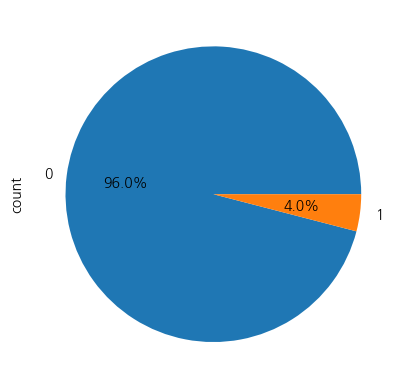

In [57]:
merged_df['clicked'].value_counts().plot.pie(autopct='%1.1f%%') 

In [ ]:
# 노출 된 뉴스들 중 클릭된 뉴스는 매우 적다는 것 확인
# 96%의 뉴스가 클릭되지 않았음
# 노출되는 뉴스들이 사용자들의 관심사가 아니라는 것을 의미할 수 있음
# 추천 시스템 구축이 필요함
# 노출된 뉴스를 클릭하지 않는 원인을 파악해야 함
# 몇가지의 원인을 예상하여 가설 검정을 통해 확인해보기

ctr: 0.0404


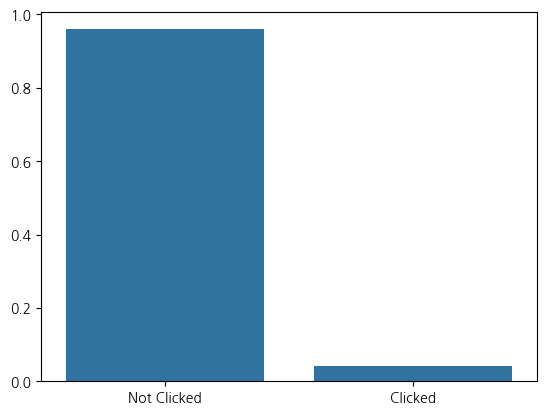

In [ ]:
#전체 클릭률

ctr = merged_df["clicked"].mean()
print(f"ctr: {ctr:.4f}")

sns.barplot(x=["Not Clicked", "Clicked"], y=[1-ctr, ctr])

plt.show()


- 제목 길이가 길거나 짧으면 클릭될 확률이 높은지..
- 개체수가 많으면 클릭될 확률이 높은지..

## 클릭된 뉴스 vs 클릭되지 않은 뉴스 비교

#### 가설 1: 뉴스 제목 길이가 클릭률에 영향을 미칠 것이다

/var/folders/kp/qjjg7mlj0bx023qd9bw7fngm0000gn/T/ipykernel_1614/3806160692.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(clicked_df["title_length"], label="Clicked", shade=True)
/var/folders/kp/qjjg7mlj0bx023qd9bw7fngm0000gn/T/ipykernel_1614/3806160692.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_clicked_df["title_length"], label="Not Clicked", shade=True)


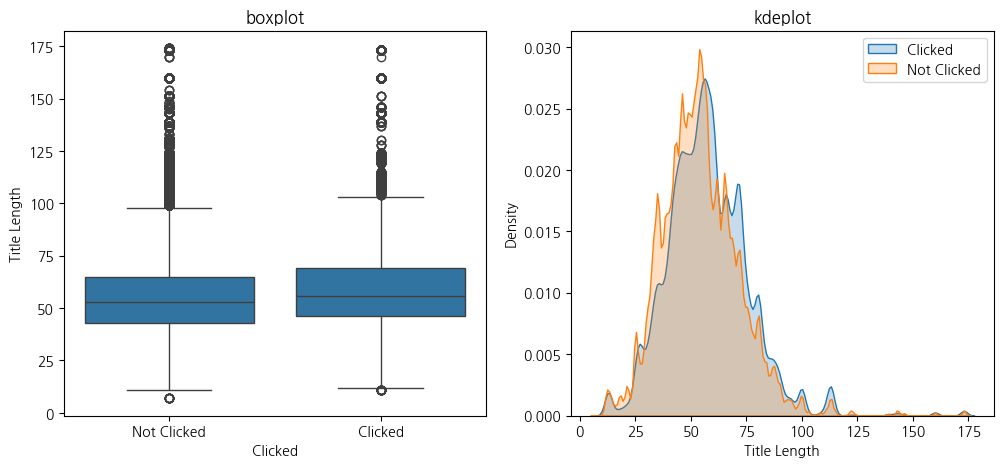

In [60]:
# 길이 비교하기

clicked_df=merged_df[merged_df['clicked']==1].copy()
non_clicked_df=merged_df[merged_df['clicked']==0].copy()

plt.figure(figsize=(12, 5))

#박스
plt.subplot(1, 2, 1)
sns.boxplot(x="clicked", y="title_length", data=merged_df)
plt.xticks([0, 1], ["Not Clicked", "Clicked"])
plt.xlabel("Clicked")
plt.ylabel("Title Length")
plt.title("boxplot")

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(clicked_df["title_length"], label="Clicked", shade=True)
sns.kdeplot(non_clicked_df["title_length"], label="Not Clicked", shade=True)
plt.xlabel("Title Length")
plt.title("kdeplot")
plt.legend()

plt.show()


In [61]:
merged_df.pivot_table(
    index="clicked", 
    values=["title_length"],
    aggfunc=["mean", "median", "std", "min", "max"]
).reset_index()

,clicked,mean,median,std,min,max
,,title_length,title_length,title_length,title_length,title_length
0,0,54.318648,53.0,17.475814,7.0,174.0
1,1,57.630924,56.0,18.336172,11.0,173.0


In [62]:
# 정규성 검정
from scipy import stats


print(stats.normaltest(clicked_df['title_length']))
print(stats.normaltest(non_clicked_df['title_length']))


NormaltestResult(statistic=45304.141487902896, pvalue=0.0)
NormaltestResult(statistic=1024557.3557347164, pvalue=0.0)


In [63]:
# 뉴스 제목 길이 데이터는 정규분포를 따르지 않음
# 둘 다 비정규성을 띠고 있기 때문에 비모수검정 실행


In [64]:
# 맨휘트니 유 검정 
from scipy.stats import mannwhitneyu
u_stat, p_value = mannwhitneyu(clicked_df["title_length"], non_clicked_df["title_length"], alternative="two-sided")
print(f"U-statistic: {u_stat:.4f}, P-value: {p_value:.4f}")


U-statistic: 676504897842.0000, P-value: 0.0000


In [65]:
# 뉴스 제목 길이와 클릭 여부 간에 유의미한 차이가 있음
# 제목이 긴 뉴스가 클릭이 더 많은 경향이 있음
# 하지만 둘의 길이가 많이 차이나는 것은 아니라서 긴게 효과적이다 라고 결론내기는 어려움
# 가중치로 활용 가능.. 

### 가설 2) 뉴스 제목에 포함된 개체(Entity) 수가 클릭 여부/ 클릭률에 영향을 미칠 것이다.

#### 클릭 여부에 영향이 있는지 검정

In [66]:
# 정규성 검정

print(stats.normaltest(clicked_df['title_entity_count']))
print(stats.normaltest(non_clicked_df['title_entity_count']))

NormaltestResult(statistic=21410.49768016626, pvalue=0.0)
NormaltestResult(statistic=647475.4877705264, pvalue=0.0)


In [67]:
# 둘 다 비정규성 띠고 있으므로, 비모수 검정

In [68]:
# 맨 휘트니 유 검정

u_stat, p_value = mannwhitneyu(clicked_df["title_entity_count"], non_clicked_df["title_entity_count"], alternative="two-sided")

print(f"U-statistic: {u_stat:.4f}, P-value: {p_value:.4f}")


U-statistic: 641413015459.5000, P-value: 0.0000


In [80]:
# 클릭 여부에 영향 미침

In [69]:
# 통계치 

clicked_entity_count = clicked_df["title_entity_count"]
non_clicked_entity_count = non_clicked_df["title_entity_count"]

summary_stats_entity = pd.DataFrame({
    "Category": ["Not Clicked", "Clicked"],
    "Mean": [non_clicked_entity_count.mean(), clicked_entity_count.mean()],
    "Median": [non_clicked_entity_count.median(), clicked_entity_count.median()],
    "Std Dev": [non_clicked_entity_count.std(), clicked_entity_count.std()],
    "Min": [non_clicked_entity_count.min(), clicked_entity_count.min()],
    "Max": [non_clicked_entity_count.max(), clicked_entity_count.max()]
})

summary_stats_entity

,Category,Mean,Median,Std Dev,Min,Max
0,Not Clicked,0.961748,1.0,0.936613,0.0,7.0
1,Clicked,1.040533,1.0,0.918020,0.0,6.0


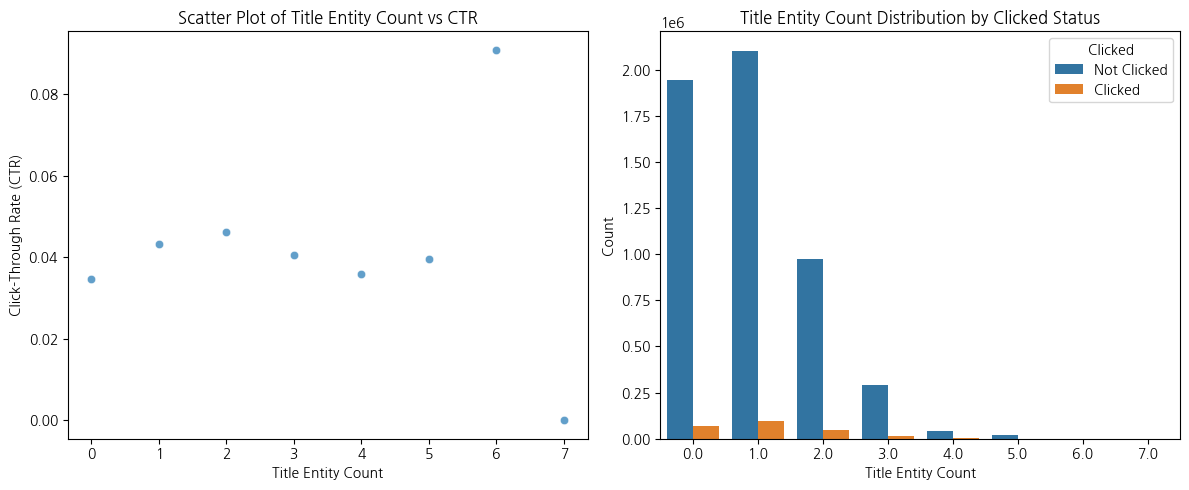

In [70]:

category_entity_ctr = merged_df.groupby("title_entity_count")["clicked"].mean().reset_index()
category_entity_ctr.columns = ["title_entity_count", "CTR"]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=category_entity_ctr["title_entity_count"], y=category_entity_ctr["CTR"], alpha=0.7)
plt.xlabel("Title Entity Count")
plt.ylabel("Click-Through Rate (CTR)")
plt.title("Scatter Plot of Title Entity Count vs CTR")

plt.subplot(1, 2, 2)
sns.countplot(x="title_entity_count", hue="clicked", data=merged_df)
plt.xlabel("Title Entity Count")
plt.ylabel("Count")
plt.title("Title Entity Count Distribution by Clicked Status")
plt.legend(title="Clicked", labels=["Not Clicked", "Clicked"])

plt.tight_layout()
plt.show()


In [78]:

print(normaltest(category_entity_ctr["title_entity_count"]))
print(normaltest(category_entity_ctr["clicked"]))  

NormaltestResult(statistic=1.7004056883060088, pvalue=0.42732824212143383)
NormaltestResult(statistic=4.2741765800621225, pvalue=0.11799791902762807)


In [83]:
# 정규성 띰

In [84]:
from scipy.stats import spearmanr, pearsonr

category_entity_ctr = merged_df.groupby("title_entity_count")["clicked"].mean().reset_index()
pearson_corr, pearson_p = pearsonr(category_entity_ctr["title_entity_count"], category_entity_ctr["clicked"])

spearman_corr, spearman_p = spearmanr(category_entity_ctr["title_entity_count"], category_entity_ctr["clicked"])

print(f"Correlation: {pearson_corr:.4f},pvalue: {pearson_p:.4f}")


Correlation: -0.0331,pvalue: 0.9381


In [ ]:
# 선형 관계 없음

In [ ]:
# 검정 결과, 뉴스 제목 길이 클릭 여부에 영향을 미침
# 클릭된 뉴스가 평균적으로 개수 더 많다고는 하지만, 크게 차이 없음
# 대부분의 뉴스 제목은 1개 정도의 개체를 포함하고 있음
#  상관분석 결과, 개체 수와 클릭률 간 상관관계는 없음(선형 관계 없음)
# 계체 수가 일정 수준 이상 포함된다고 해서 클릭 가능성이 계속 증가하지 않음
# 클릭률을 높이기 위해서는 제목의 질적 요소가 중요해 보임
# 의미있는 개체가 포함되는지가 중요

### 가설 3) 뉴스 카테고리에 따라 클릭률에 유의미한 차이가 있을 것이다.

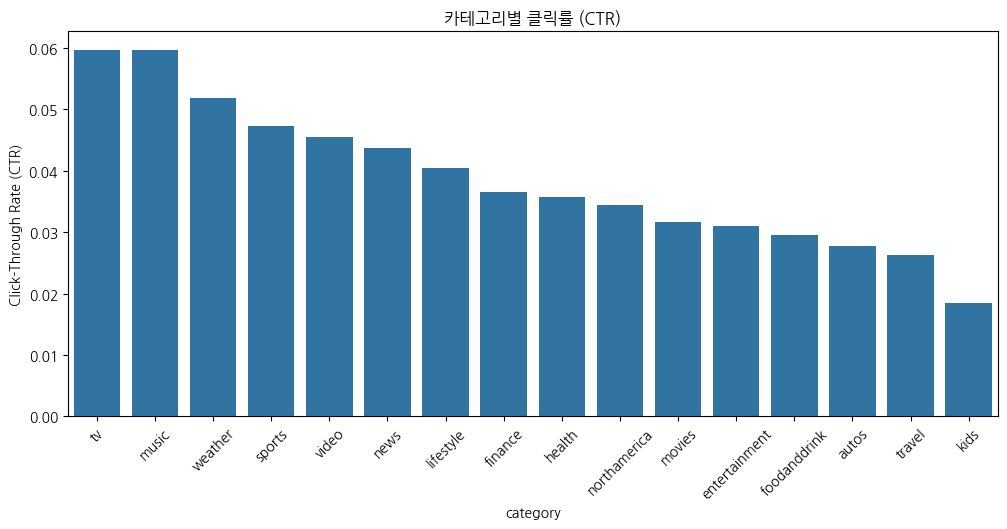

In [73]:
# 카테고리별 클릭률 계산

category_clicks = merged_df.groupby("category")["clicked"].value_counts().unstack()
category_clicks.fillna(0, inplace=True)

category_ctr = (category_clicks[1] / (category_clicks[0] + category_clicks[1])).reset_index()
category_ctr.columns = ["category", "CTR"]

category_ctr = category_ctr.sort_values("CTR", ascending=False)


plt.figure(figsize=(12, 5))
sns.barplot(x="category", y="CTR", data=category_ctr, order=category_ctr["category"])
plt.xticks(rotation=45)
plt.ylabel("Click-Through Rate (CTR)")
plt.title("카테고리별 클릭률 (CTR)")
plt.show()


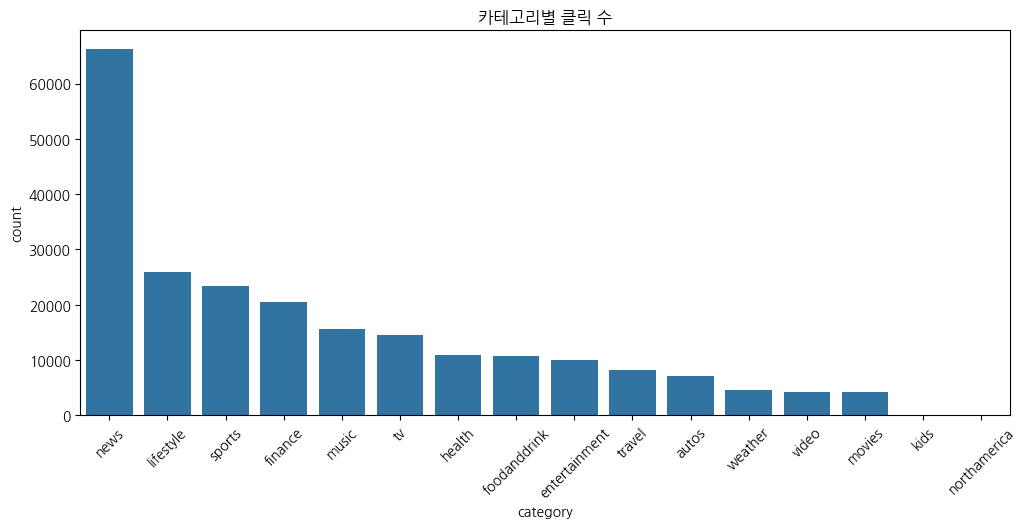

In [74]:
clicked_df=merged_df[merged_df['clicked']==1]

plt.figure(figsize=(12,5))
sns.countplot(x='category',data=clicked_df,order=clicked_df['category'].value_counts().index)   
plt.title('카테고리별 클릭 수')
plt.xticks(rotation=45)
plt.show()


In [76]:
import scipy.stats as stats

category_clicks = merged_df.groupby("category")["clicked"].value_counts().unstack().fillna(0)
chi2_stat, p_val, dof, expected = stats.chi2_contingency(category_clicks)

print(f"Chi-Square Statistic: {chi2_stat:.4f}, P-value: {p_val:.4f}")


Chi-Square Statistic: 11389.9651, P-value: 0.0000


## 클릭 된 뉴스들 중 카테고리별 수 

In [54]:
# 클릭이 많이 된 카테고리 확인

merged_df.pivot_table(index='category',values='clicked',aggfunc=['sum','mean']).reset_index().sort_values(by=('sum','clicked'),ascending=False) 

,category,sum,mean
,,clicked,clicked
9,news,66296,0.043645
6,lifestyle,25938,0.040509
11,sports,23390,0.047345
2,finance,20558,0.036579
8,music,15587,0.059657
13,tv,14495,0.059727
4,health,10850,0.035717
3,foodanddrink,10778,0.029465
1,entertainment,10051,0.030964


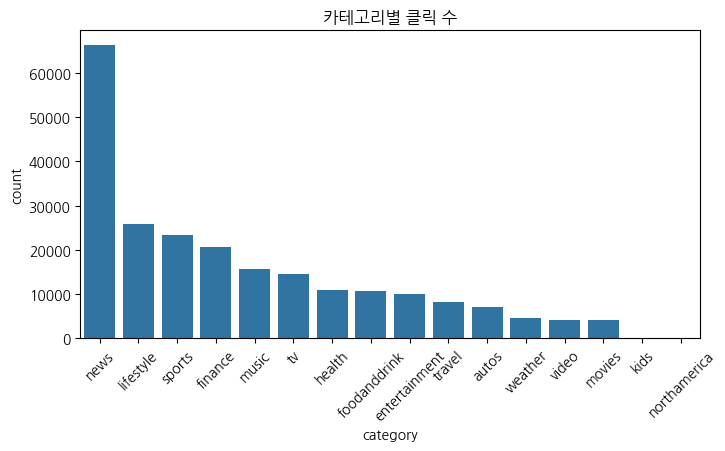

In [59]:
clicked_df=merged_df[merged_df['clicked']==1]

plt.figure(figsize=(8,4))
sns.countplot(x='category',data=clicked_df,order=clicked_df['category'].value_counts().index)   
plt.title('카테고리별 클릭 수')
plt.xticks(rotation=45)
plt.show()


## 클릭되지 않은 뉴스들 중 카테고리별 수 

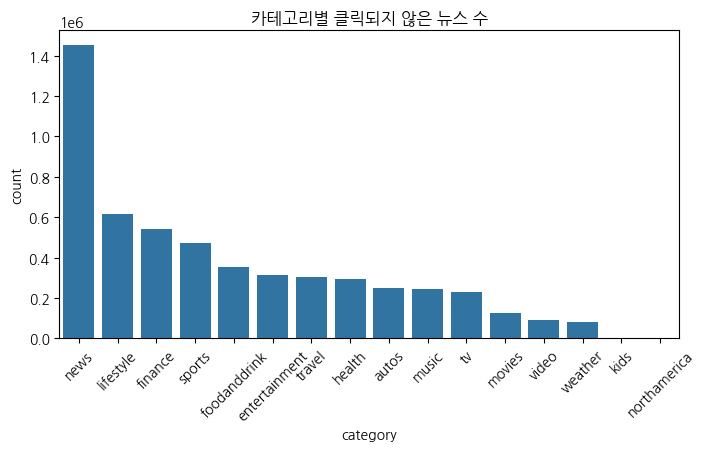

In [61]:
non_clicked_df=merged_df[merged_df['clicked']==0] 

plt.figure(figsize=(8,4))
sns.countplot(x='category',data=non_clicked_df,order=non_clicked_df['category'].value_counts().index)
plt.title('카테고리별 클릭되지 않은 뉴스 수')
plt.xticks(rotation=45)
plt.show()


In [35]:
news_df.head()

,news_id,category,subcategory,title,abstract,title_entities,abstract_entities,title_length,abstract_length,title_word_count,abstract_word_count
0,N55528,lifestyle,lifestyleroyals,brands queen elizabeth prince charles prince philip swear,shop notebooks jackets more the royals cant live without,"[{""Label"": ""Prince Philip, Duke of Edinburgh"", ""Type"": ""P"", ""WikidataId"": ""Q80976"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [48], ""SurfaceForms"": [""Prince Philip""]}, {""Label"": ""Charles, Prince of Wales"", ""Type"": ""P"", ""WikidataId"": ""Q43274"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [28], ""SurfaceForms"": [""Prince Charles""]}, {""Label"": ""Elizabeth II"", ""Type"": ""P"", ""WikidataId"": ""Q9682"", ""Confidence"": 0.97, ""OccurrenceOffsets"": [11], ""SurfaceForms"": [""Queen Elizabeth""]}]",[],57,56,8,9
1,N19639,health,weightloss,50 worst habits belly fat,seemingly harmless habits holding back keeping from shedding unwanted belly fat good,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""WikidataId"": ""Q193583"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [20], ""SurfaceForms"": [""Belly Fat""]}]","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""WikidataId"": ""Q193583"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [97], ""SurfaceForms"": [""belly fat""]}]",25,84,5,12
2,N61837,news,newsworld,cost trumps aid freeze the trenches ukraines war,lt ivan molchanets peeked a parapet sand bags the front line the war ukraine next him an empty helmet propped to trick snipers already perforated multiple holes,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId"": ""Q212"", ""Confidence"": 0.946, ""OccurrenceOffsets"": [87], ""SurfaceForms"": [""Ukraine""]}]",48,160,8,27
3,N53526,health,voices,was nba wife heres it affected mental health,felt like was fraud being nba wife didnt help in fact nearly destroyed,[],"[{""Label"": ""National Basketball Association"", ""Type"": ""O"", ""WikidataId"": ""Q155223"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [40], ""SurfaceForms"": [""NBA""]}]",44,70,8,13
4,N38324,health,medical,get rid skin tags according to a dermatologist,seem harmless theres very good reason shouldnt ignore the post get rid skin tags according to a dermatologist appeared first readers digest,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataId"": ""Q3179593"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [18], ""SurfaceForms"": [""Skin Tags""]}]","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataId"": ""Q3179593"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [105], ""SurfaceForms"": [""Skin Tags""]}, {""Label"": ""Dermatology"", ""Type"": ""C"", ""WikidataId"": ""Q171171"", ""Confidence"": 1.0, ""OccurrenceOffsets"": [131], ""SurfaceForms"": [""Dermatologist""]}, {""Label"": ""Reader's Digest"", ""Type"": ""M"", ""WikidataId"": ""Q371820"", ""Confidence"": 0.999, ""OccurrenceOffsets"": [163], ""SurfaceForms"": [""Reader's Digest""]}]",46,139,8,22
